In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Данные

In [2]:
data = pd.read_csv('Pokemon.csv' , sep = ',', engine = 'python')

Набор данных содержит 800 экземпляров, описанных 13 признаками: `#`, `Name`, `Type 1`, `Type 2`, `Total`, `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, `Generation`, `Legendary`.

In [3]:
print(data.shape)
print(data.columns)

(800, 13)
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


Каждый экземпляр представляет собой описание конкретного персонажа (pokemon-а) из серии компьютерных игр Pokémon. Покедекс - внутриигровой каталог pokemon-ов.

- `#` - номер pokemon-а в покедексе
- `Name` - наименование в покедексе
- `Type 1` - обязательный тип pokemon-а
- `Type 2` - необязательный тип pokemon-а
- `Total` - сумарное значение всех статистических данных по рассматриваемому экземпляру
- `HP` - единицы здаровья
- `Attack` - единицы наносимого урона (атаки)
- `Defense` - единицы отражаемого урона (защиты)
- `Sp. Atk` - единицы наносимого урона во время специальной атаки
- `Sp. Def` - единицы отражаемого урона во время специальной атаки
- `Speed` - единицы скорости
- `Generation` - поколение pokemon-ов (в каком обновлении появился рассматриваемый pokemon)
- `Legendary` - легендарность (фактически, редкость рассматриваемого pokemon-а)

In [4]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [6]:
data.index

RangeIndex(start=0, stop=800, step=1)

In [7]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Построим матрицу рассеяния, чтобы рассмотреть корреляцию между парами признаков:

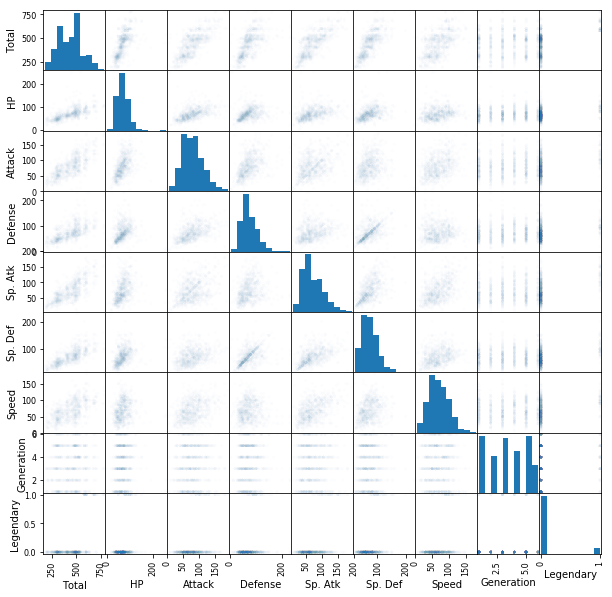

In [8]:
from pandas.plotting import scatter_matrix

#преобразуем столбец data['Legendary'] типа bool к целочисленному типу, чтобы включить его в матрицу рассеяния
data['Legendary'] = np.where(data['Legendary'], 1, 0)

scatter_matrix(data.iloc[:, 4:13], alpha = .01, figsize = (10, 10))
pass

Можно заметить, что по многим признакам наблюдается почти линейная зависимость. Более всего это заметно для Defense и Sp. Def:

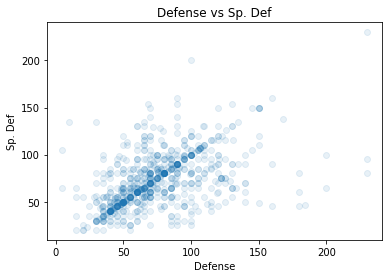

In [9]:
plt.plot(data['Defense'], data['Sp. Def'], 'o', alpha = 0.1)
plt.xlabel('Defense')
plt.ylabel('Sp. Def')
plt.title('Defense vs Sp. Def')
pass

In [10]:
data.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


Если теперь рассмотреть отдельно сумарное значение по всем показателям `Total`, поколение `Generation` и легендарность `Legendary`, то будет видно, что в каждом поколении pokemon-ы с наивысшими показателями являются легендарными, что вполне ожидаемо.

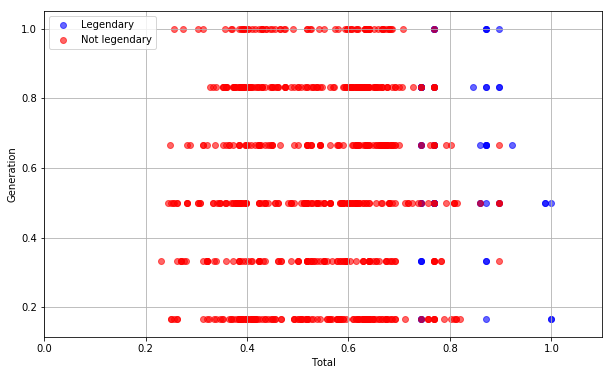

In [11]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Legendary'] == 1]['Total'] / np.max(data['Total']),
            data[data['Legendary'] == 1]['Generation'] / np.max(data['Generation']),
            alpha = 0.6,
            label = 'Legendary',
            color = 'b')

plt.scatter(data[data['Legendary'] == 0]['Total'] / np.max(data['Total']),
            data[data['Legendary'] == 0]['Generation'] / np.max(data['Generation']),
            alpha = 0.6,
            label = 'Not legendary',
            color = 'r')

plt.title('')
plt.xlabel('Total')
plt.ylabel('Generation')
plt.xlim(0, 1.1)
plt.legend()
plt.grid()

### Подготовка данных

In [12]:
data.describe(include = 'all')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Mienshao,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,362.813750,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,208.343798,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.000000,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,184.750000,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,364.500000,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,539.250000,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000


Как уже упоминалось ранее, признак `Type 2` не является обязательным для экземпляра, потому его значение есть не всегда:

In [13]:
data.count(axis = 0)

#             800
Name          800
Type 1        800
Type 2        414
Total         800
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

Всвязи со спецификой признака `Type 2`, его нельзя заменить самым популярным значением в столбце, а учитывая, что его нет почти у половины экземпляров, то удалять строки с пропущенным значением будет значить сократить набор данных вдвое. Потому столбец с этим признаком просто удаляется. 

Так же логичным будет убрать столбец с наименованием (`Name`), поскольку он уникален для каждого экземпляра. 

In [14]:
data = data.drop('Name',   axis = 1)\
           .drop('Type 2', axis = 1)

#Для повторного исследования можно убрать и признак 'Total', поскольку он делает задачу слишком простой
#data = data.drop('Total', axis = 1)

data.count(axis = 0)

#             800
Type 1        800
Total         800
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

Для удобства, разделим исходный набор data на два поднабора `data_categorical` и `data_numerical`, содержащие категориальные и числовые признаки соответственно.

In [15]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object' and data[c].name != 'Legendary']

data_categorical = data[categorical_columns]
data_numerical = data[numerical_columns]

Причем в набор числовых признаков не включается признак `Legendary`, поскольку он уже приведен к виду меток класса и более менять его не нужно.

#### Категориальные признаки

Чтобы работать с категориальными признаками проводится процедура векторизации, где последний оставшейся категориальный призак `Type 1` заменяется на множество числовых признаков, включеющее в себя все значения признака `Type 1` (а их 18) как наименования признаков. И далее, когда экземпляр принимает некоторое значение из этого множества, то соотверствующий числовой признак принимает значение `1`, а остальные - `0`.

In [16]:
data_categorical = pd.get_dummies(data_categorical)
print(data_categorical.columns)

Index(['Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric',
       'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying',
       'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice',
       'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock',
       'Type 1_Steel', 'Type 1_Water'],
      dtype='object')


#### Числовые признаки

In [17]:
data_numerical.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Приведем каждый числовой признак к нулевому среднему и единичному среднеквадратичному отклонению:

In [18]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-2.325917e-16,-1.160183e-16,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.736619e+00,-2.126509e+00,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00
25%,-8.546631e-01,-8.761240e-01,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01
50%,8.093593e-03,1.241841e-01,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01
75%,8.468515e-01,6.660176e-01,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00
max,1.719208e+00,2.875031e+00,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00


#### Окончательный набор данных

In [19]:
data = pd.concat((data_numerical, data_categorical, data['Legendary']), axis = 1)
print(data.shape)

(800, 28)


In [20]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,...,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Legendary
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,-2.325917e-16,-1.160183e-16,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15,0.086250,...,0.087500,0.040000,0.030000,0.122500,0.035000,0.071250,0.055000,0.033750,0.140000,0.08125
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.280908,...,0.282743,0.196082,0.170694,0.328068,0.183895,0.257403,0.228123,0.180698,0.347204,0.27339
min,-1.736619e+00,-2.126509e+00,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-8.546631e-01,-8.761240e-01,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,8.093593e-03,1.241841e-01,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,8.468515e-01,6.660176e-01,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.719208e+00,2.875031e+00,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Разбиваем данные на `X` и `y`: 

In [21]:
X = data.drop(('Legendary'), axis = 1)
y = data['Legendary']
feature_names = X.columns

In [22]:
print(X.shape)
print(y.shape)
N, d = X.shape

(800, 27)
(800,)


Разбиваем данные на `test` и `train`:

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

560 240


### kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [25]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

#### Расчет ошибки

1-ый способ:

In [26]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.039285714285714285 0.04583333333333333


2-ой способ:

In [27]:
err_test = 1 - knn.score(X_test, y_test)

In [28]:
err_test

0.04583333333333328

Так же можно рассмотреть ошибки первого и второго рода:

In [29]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[221   4]
 [  7   8]]


Здесь:

`[[TN FP]
  [FN TP]]`

#### Подбор параметров

In [30]:
from sklearn.model_selection import GridSearchCV

nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.048214285714285765 5


In [31]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.03571428571428571 0.05


### Random Forest

In [32]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.016666666666666666


#### Значимость признаков

In [33]:
np.sum(rf.feature_importances_)

0.9999999999999996

In [34]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'Total' (0.284704)
 2. feature 'Sp. Atk' (0.119478)
 3. feature '    #' (0.097446)
 4. feature '   HP' (0.087427)
 5. feature 'Speed' (0.086707)
 6. feature 'Sp. Def' (0.084196)
 7. feature 'Attack' (0.076134)
 8. feature 'Defense' (0.055639)
 9. feature 'Generation' (0.031114)
10. feature 'Type 1_Water' (0.011518)
11. feature 'Type 1_Psychic' (0.011041)
12. feature 'Type 1_Dragon' (0.009695)
13. feature 'Type 1_Normal' (0.005289)
14. feature 'Type 1_Fire' (0.005083)
15. feature 'Type 1_Flying' (0.004274)
16. feature 'Type 1_Steel' (0.004200)
17. feature 'Type 1_Bug' (0.004148)
18. feature 'Type 1_Ice' (0.004000)
19. feature 'Type 1_Grass' (0.003783)
20. feature 'Type 1_Electric' (0.003403)
21. feature 'Type 1_Ground' (0.003244)
22. feature 'Type 1_Rock' (0.002591)
23. feature 'Type 1_Dark' (0.002047)
24. feature 'Type 1_Fighting' (0.001671)
25. feature 'Type 1_Ghost' (0.000676)
26. feature 'Type 1_Fairy' (0.000409)
27. feature 'Type 1_Poison' (0.000081)


(-1, 20)

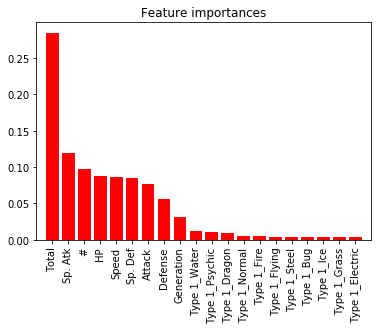

In [35]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Можно сделать вывод, что признак `Type` практически не влияет на точность. Самым же значимым является признак `Total`, отображающий суммарное значение всех характеристик экземпляра, что совсем неудивительно, поскольку такая очевидная зависимость наблюдалась еще при первичном анализе данных.

### MLPClassifier

Уберем из данных признак `Total` и снова разобъем их на `train` и `test`:

In [36]:
data = pd.read_csv('Pokemon.csv' , sep = ',', engine = 'python')
data['Legendary'] = np.where(data['Legendary'], 1, 0)
data = data.drop('Name',   axis = 1)\
           .drop('Type 2', axis = 1)\
           .drop('Total', axis = 1)\
           .drop('#', axis = 1)

categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object' and data[c].name != 'Legendary']

data_categorical = data[categorical_columns]
data_numerical = data[numerical_columns]

data_categorical = pd.get_dummies(data_categorical)
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

data = pd.concat((data_numerical, data_categorical, data['Legendary']), axis = 1)

X = data.drop(('Legendary'), axis = 1)
y = data['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Обучаем классификатор

In [37]:
from sklearn.neural_network import MLPClassifier

Обучим сеть с одним скрытым слоем из 20 нейронов:

In [38]:
mlp_model = MLPClassifier(hidden_layer_sizes = (20,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

#### Проверяем качество классификатора

In [39]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Если посмотреть ошибки на обучающей и тестовой выборках, то станет понятно, что и такой небольшой сети будет достаточно для данной задачи:

In [40]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0625


Чтобы в этом убедиться, посмотрим на ответы сети. Для образца под номером 25:

In [41]:
X_test.iloc[[25]]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,Type 1_Dragon,...,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
30,-1.341656,-0.73947,-1.085269,-0.697384,-0.787041,0.747493,-1.398762,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Метка класса - `0` (не легендарный):

In [42]:
y_test.iloc[[25]]

30    0
Name: Legendary, dtype: int32

Ответ сети - `0` (не легендарный):

In [43]:
mlp_model.predict(X_test.iloc[[25]])

array([0])

Для образца под номером 214:

In [44]:
X_test.iloc[[214]]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,Type 1_Dragon,...,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water
164,1.438877,2.187446,-0.123222,3.703286,1.728328,2.468043,-1.398762,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Метка класса - `1` (легендарный):

In [45]:
y_test.iloc[[214]]

164    1
Name: Legendary, dtype: int32

Ответ сети - `1` (легендарный):

In [46]:
mlp_model.predict(X_test.iloc[[214]])

array([1])

То есть сеть дает верный ответ и для обоих классов.

#### Подбор гиперпараметров

Обучим несколько сетей с разным параметром регуляризации `alpha`:

In [47]:
alpha_arr = np.logspace(-4, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

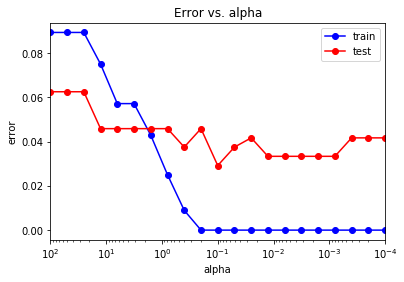

In [48]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Из графика зависимости ошибок на тренировочном множестве `train` и тестоом множестве `test` от параметра регуляризации `alpha` видно, что при слишком большом параметре `alpha`(> 10) происходит underfitting и мы имеем большую ошибку как на тестовом множестве, так и на тренировочном. В то же время, при слишком малом параметре `alpha`(< 0.1) происходит обратное, а именно overfitting и при маленькой ошибке на тренировочном множестве, ошибка на тестовом множестве не только не убывает, но и начинает расти.

Это происходит из-за того, что при большом кол-ве свободных параметров модель плохо обобщается, а добавленный для борьбы с этим регуляризатор при маленьком `alpha` вносит слишком маленький вклад. При большом же `alpha` регуляризатор вносит слишком бошьшой вклад и регуляризация, отвечающая за сокращение весов, делает модель слишком обобщенной, которая в результате дает  много неверных прогнозов. 

Минимальное значение ошибки:

In [49]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.029166666666666667


Оптимальное значение alpha:

In [50]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.1]


In [51]:
alpha_opt = alpha_opt[0]

#### Классификатор при найденном оптимальном значении alpha

In [52]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.029166666666666667


#### Матрица рассогласования:

In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[220   2]
 [  5  13]]


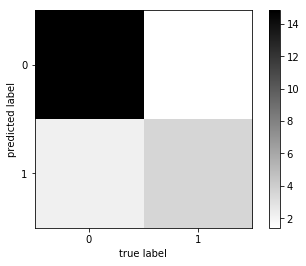

In [54]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

#### Другие метрики качества:

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       225
          1       0.72      0.87      0.79        15

avg / total       0.97      0.97      0.97       240



### Random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

Случайный лес для одного дерева:

In [57]:
rf = RandomForestClassifier(n_estimators = 1, random_state=42)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.033928571428571426 0.0875


Теперь посмотрим на ошибку на тестовой и обучающей выборках при разном кол-ве деревьев:

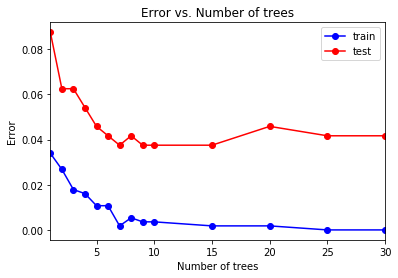

In [58]:
numbers_space = list(range(1,10)) + list(range(10,35,5))

err_train = []
err_test = []
for number in numbers_space:
    rf = RandomForestClassifier(n_estimators = number, random_state=42)
    rf.fit(X_train, y_train)

    err_train.append(np.mean(y_train != rf.predict(X_train)))
    err_test.append(np.mean(y_test  != rf.predict(X_test)))
    
plt.plot(numbers_space, err_train, 'b-o', label = 'train')
plt.plot(numbers_space, err_test, 'r-o', label = 'test')
plt.xlim([np.min(numbers_space), np.max(numbers_space)])
plt.title('Error vs. Number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

Задача сама по себе является простой, потому и на одном дереве ее ошибка невелика. Можно взять и больше деревьев, но не более десяти, иначе можно наблюдать переобучение.

Построим на одном графике ошибку на тестовом множестве и oob ошибку:

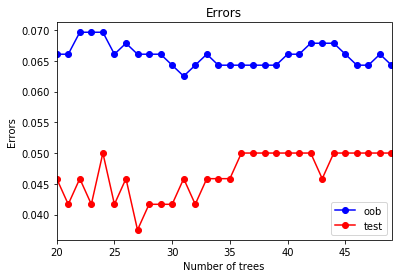

In [59]:
numbers_space = list(range(20,50))
err_train = []
err_test = []
err_oob = []
for number in numbers_space:
    rf = RandomForestClassifier(n_estimators = number, random_state=42, oob_score=True)
    rf.fit(X_train, y_train)

    err_test.append(np.mean(y_test  != rf.predict(X_test)))
    err_oob.append(1 - rf.oob_score_)
    
plt.plot(numbers_space, err_oob, 'b-o', label = 'oob')
plt.plot(numbers_space, err_test, 'r-o', label = 'test')
plt.xlim([np.min(numbers_space), np.max(numbers_space)])
plt.title('Errors')
plt.xlabel('Number of trees')
plt.ylabel('Errors')
plt.legend()
pass

Можно видеть, что oob ошибка близка к ошибке на тестовой выборке, но все же ее значения выше.

### Extremely random forests

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

In [61]:
erf = ExtraTreesClassifier(n_estimators = 2)
erf.fit(X_train, y_train)

err_train = np.mean(y_train != erf.predict(X_train))
err_test  = np.mean(y_test  != erf.predict(X_test))

print(err_train, err_test)

0.0 0.058333333333333334


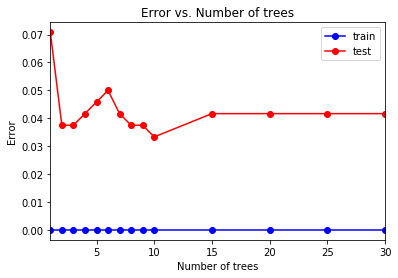

In [62]:
numbers_space = list(range(1,10)) + list(range(10,35,5))

err_train = []
err_test = []
for number in numbers_space:
    erf = ExtraTreesClassifier(n_estimators = number, random_state=42)
    erf.fit(X_train, y_train)

    err_train.append(np.mean(y_train != erf.predict(X_train)))
    err_test.append(np.mean(y_test  != erf.predict(X_test)))
    
plt.plot(numbers_space, err_train, 'b-o', label = 'train')
plt.plot(numbers_space, err_test, 'r-o', label = 'test')
plt.xlim([np.min(numbers_space), np.max(numbers_space)])
plt.title('Error vs. Number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

Как и для Random forest, при количестве деревьев больше десяти наблюдается переобучение.

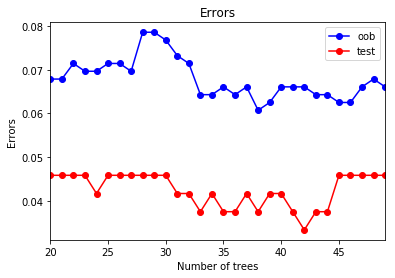

In [63]:
numbers_space = list(range(20,50))
err_test = []
err_oob = []
for number in numbers_space:
    erf = ExtraTreesClassifier(n_estimators = number, random_state=42, oob_score=True, bootstrap=True)
    erf.fit(X_train, y_train)

    err_test.append(np.mean(y_test  != erf.predict(X_test)))
    err_oob.append(1 - erf.oob_score_)
    
plt.plot(numbers_space, err_oob, 'b-o', label = 'oob')
plt.plot(numbers_space, err_test, 'r-o', label = 'test')
plt.xlim([np.min(numbers_space), np.max(numbers_space)])
plt.title('Errors')
plt.xlabel('Number of trees')
plt.ylabel('Errors')
plt.legend()
pass

### Adaboost

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
ab = AdaBoostClassifier(n_estimators = 3, random_state=42)
ab.fit(X_train, y_train)

err_train = np.mean(y_train != ab.predict(X_train))
err_test  = np.mean(y_test  != ab.predict(X_test))

print(err_train, err_test)

0.060714285714285714 0.058333333333333334


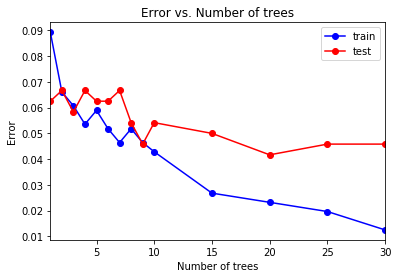

In [66]:
numbers_space = list(range(1,10)) + list(range(10,35,5))

err_train = []
err_test = []
for number in numbers_space:
    ab = AdaBoostClassifier(n_estimators = number, random_state=42)
    ab.fit(X_train, y_train)

    err_train.append(np.mean(y_train != ab.predict(X_train)))
    err_test.append(np.mean(y_test  != ab.predict(X_test)))
    
plt.plot(numbers_space, err_train, 'b-o', label = 'train')
plt.plot(numbers_space, err_test, 'r-o', label = 'test')
plt.xlim([np.min(numbers_space), np.max(numbers_space)])
plt.title('Error vs. Number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

При кол-ве деревьев меньше трех, модель недообучена; больше двадцати - переобучена.

### Gradient boosted trees

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbt = GradientBoostingClassifier(n_estimators = 1)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print(err_train, err_test)

0.08928571428571429 0.0625


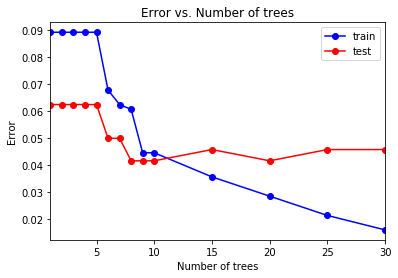

In [69]:
numbers_space = list(range(1,10)) + list(range(10,35,5))

err_train = []
err_test = []
for number in numbers_space:
    gbt = GradientBoostingClassifier(n_estimators = number, random_state=42)
    gbt.fit(X_train, y_train)

    err_train.append(np.mean(y_train != gbt.predict(X_train)))
    err_test.append(np.mean(y_test  != gbt.predict(X_test)))
    
plt.plot(numbers_space, err_train, 'b-o', label = 'train')
plt.plot(numbers_space, err_test, 'r-o', label = 'test')
plt.xlim([np.min(numbers_space), np.max(numbers_space)])
plt.title('Error vs. Number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

Кол-во деревьев нужно выбирать из диапозона `[10, 20]`, поскольку на меньшем кол-ве наблюдается недообучение, а на большем - переобучение. 